# 1. Introduction

"""
This notebook aims to perform sentiment analysis on app reviews by analyzing user feedback to understand
the overall sentiment expressed in reviews. The analysis helps app developers and businesses improve user
experience and prioritize feature updates.
"""



# 2. Objective

"""
The objective is to classify app reviews as positive, negative, or neutral, based on user sentiment.
We'll leverage Python libraries such as Pandas, Matplotlib, Seaborn, and TextBlob for analysis and visualization.
"""


In [3]:
!pip install textblob


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 8.6 MB/s eta 0:00:00a 0:00:01


In [5]:
# 3. Importing Libraries and Loading Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# Load the dataset
linkedin_data = pd.read_csv("linkedin-reviews.csv")

# Display the first few rows of the dataset
linkedin_data.head()


,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


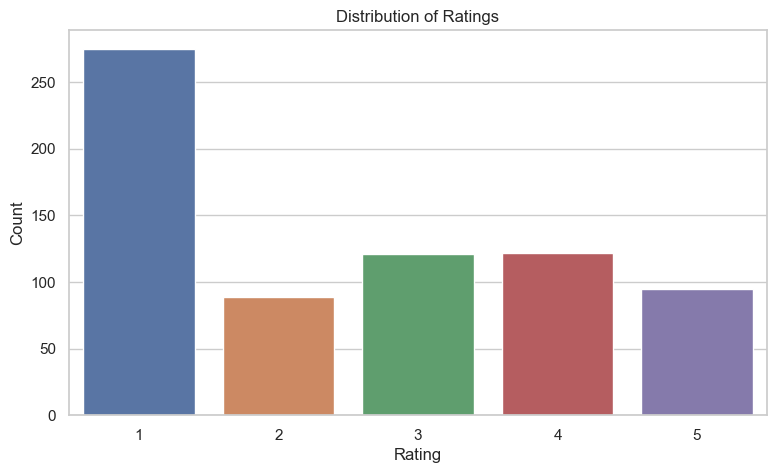

In [6]:
# 4. Exploratory Data Analysis (EDA)

# 4.1 Distribution of Ratings

sns.set(style="whitegrid")
plt.figure(figsize=(9, 5))
sns.countplot(data=linkedin_data, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


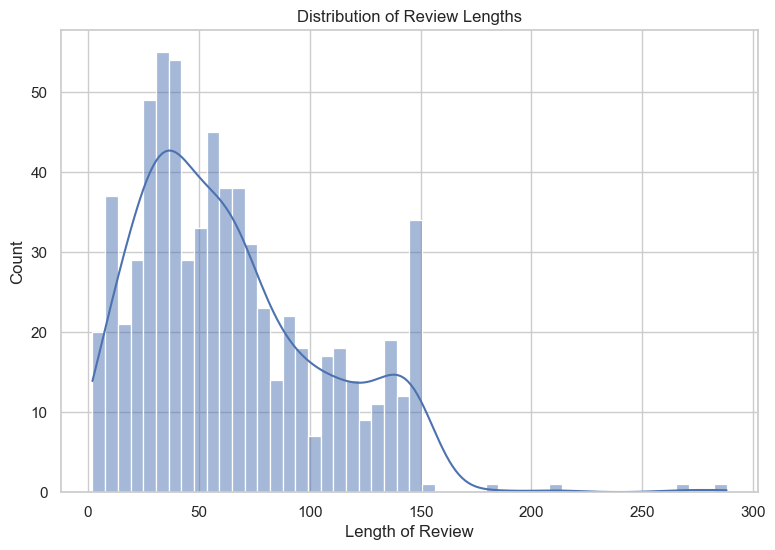

In [7]:
# 4.2 Review Length Analysis

linkedin_data['Review Length'] = linkedin_data['Review'].apply(len)

# Plotting the distribution of review lengths
plt.figure(figsize=(9, 6))
sns.histplot(linkedin_data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()


In [8]:
# 5. Sentiment Labeling with TextBlob

# 5.1 Adding Sentiment Labels

def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Applying TextBlob sentiment analysis to the reviews
linkedin_data['Sentiment'] = linkedin_data['Review'].apply(textblob_sentiment_analysis)

# Displaying the first few rows with the sentiment
linkedin_data.head()


,Review,Rating,Review Length,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,80,Negative
1,Force close(galaxy tab),1,23,Neutral
2,Slow and it tries to upload your contacts with...,1,61,Negative
3,Add ability to customize the profile and move ...,4,90,Neutral
4,"Good app, but it's a pain that it's not possib...",4,133,Positive


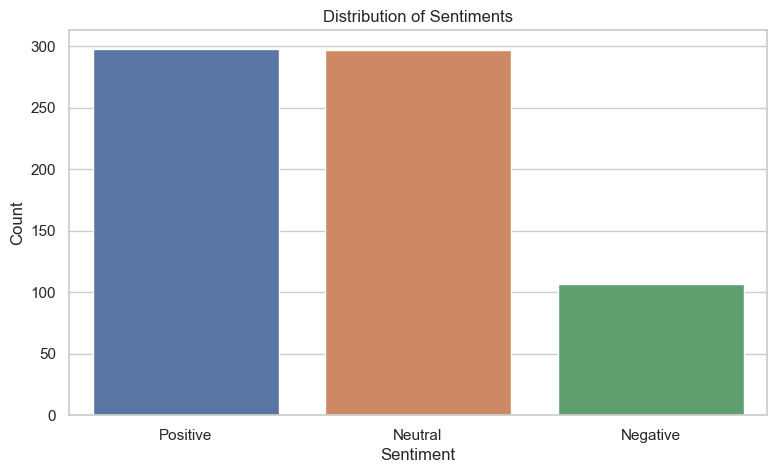

In [9]:
# 6. Sentiment Analysis

# 6.1 Distribution of Sentiments

sentiment_distribution = linkedin_data['Sentiment'].value_counts()

# Plotting the distribution of sentiments
plt.figure(figsize=(9, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


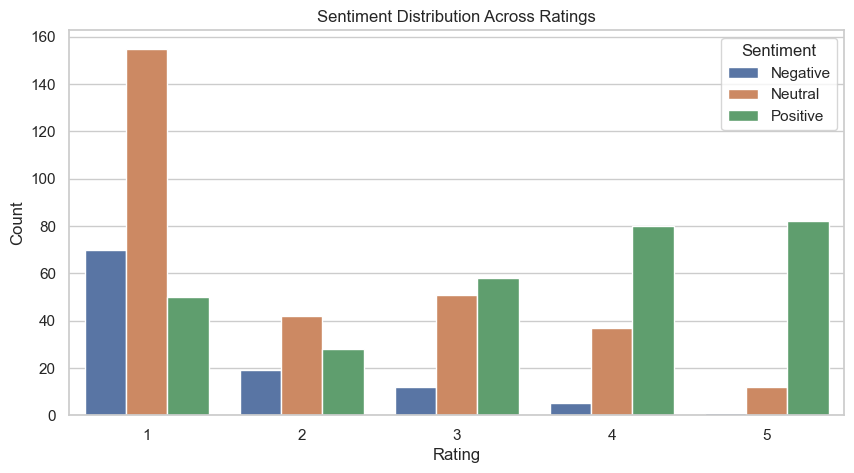

In [10]:
# 6.2 Sentiment Distribution Across Ratings

plt.figure(figsize=(10, 5))
sns.countplot(data=linkedin_data, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


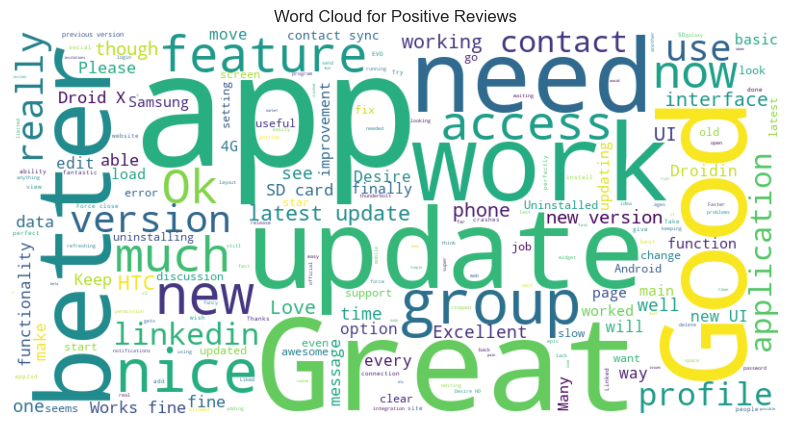

In [11]:
# 7. Word Cloud Analysis

# 7.1 Word Cloud for Positive Reviews

def generate_word_cloud(sentiment):
    text = ' '.join(review for review in linkedin_data[linkedin_data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

generate_word_cloud('Positive')


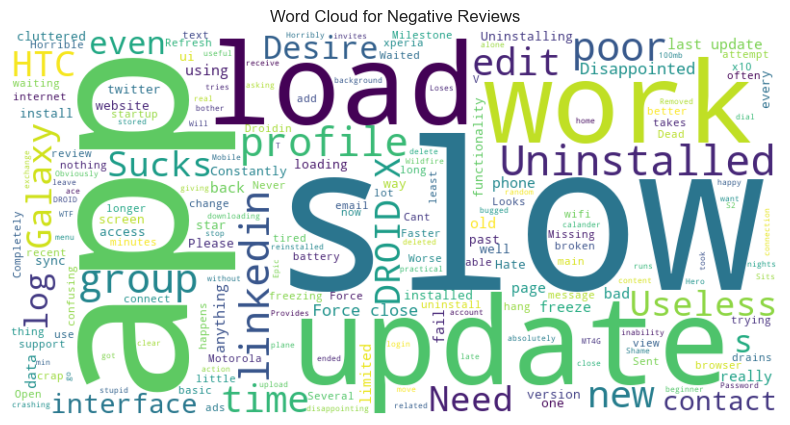

In [12]:
# 7.2 Word Cloud for Negative Reviews

generate_word_cloud('Negative')


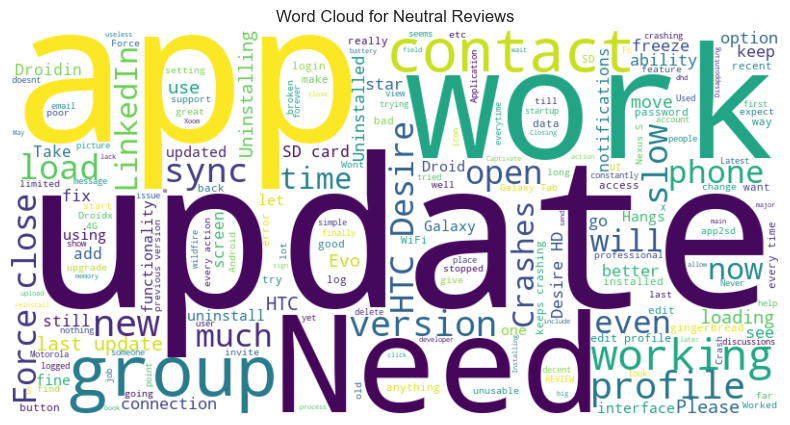

In [13]:
# 7.3 Word Cloud for Neutral Reviews

generate_word_cloud('Neutral')


# 8. Conclusion

"""
The sentiment analysis of app reviews provides valuable insights into user feedback, helping to identify 
common issues and areas for improvement. The distribution of sentiments and their correlation with ratings 
can guide developers in enhancing user satisfaction and maintaining a positive user community.
"""
